## Ejercicio

- Generar una distribución de puntos aleatoria en una caja de lado L.
- Calcular la funciónd de correlación y verificar que en el cubo generado, ésta es cero.
- Que el programe funcione en 2 y 3 dimensiones.
- Usar el código para calcular 2PCF en el conjunto de datos que nos proporcionará
- ¿Cómo haría más eficiente el cálculo?

### Inicialización

In [26]:
import numpy as np
import matplotlib as mplt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # <--- This is important for 3d plotting 
import math

### Códigos de cálculos

#### Generar una distribución de puntos aleatorios en un cubo de lado L

In [152]:
def generateCubeRandom(L, seed= False, numeroPuntos=5):
    '''
    Descripción: Función que genera puntos aleatorios dentro de un cubo.
    IN = {
        L: El tamaño de los lados del cubo
        seed: Una seed para tener datos consistentes, si es False entonces es 100% random
        numeroPuntos: El número de puntos que queremos generar
    }
    OUT: Una lista de puntos aleatorios dentro del cubo de lado L
    '''
    if seed:
        np.random.seed(seed)
        
    x = [np.random.uniform(0, L) for punto in range(numeroPuntos)]
    y = [np.random.uniform(0, L) for punto in range(numeroPuntos)]
    z = [np.random.uniform(0, L) for punto in range(numeroPuntos)]
    
    return [x,y,z]

#### Función de correlación

In [186]:
def correlacionFuncion(coordenadas, r, L, d):
    '''
    Descripción: Calcula la función de correlación de unos puntos dados
    IN = {
        coordenadas: Lista de coordenadas en 2 o 3 dimensiones.
        r: Parámetro de distancia entre puntos.
        L: El tamaño de nuestra distribución aleatoria (Lado del cubo que queramos).
        d: El rango de aceptación de nuestras comparaciones
    }
    OUT: El valor de la función de correlación en ese punto
    '''
    # Primero calculamos el número de puntos y de pares de puntos que hay, además del número de dimensiones
    numeroPuntos = len(coordenadas[0])
    numeroPares = math.factorial(numeroPuntos) / (2*math.factorial(numeroPuntos-2))
    numeroDimensiones = len(coordenadas)
    
    # Ahora tenemos que separar los puntos para operar fácilmente
    if numeroDimensiones == 3:
        puntos=[[coordenadas[0][punto],coordenadas[1][punto],coordenadas[2][punto]] for punto in range(numeroPuntos)]
    else:
        puntos=[[coordenadas[0][punto],coordenadas[1][punto],0] for punto in range(numeroPuntos)]
    matrizDistancias = crearMatrizDistancias(puntos, numeroPuntos) # Creamos la matriz de distancias para los puntos dados
    
    # Creamos una distribución aleatoria, en este caso en un cubo y de nuevo, lo pasamos a un nuevo arreglo de puntos
    newDistribution = generateCubeRandom(L=L, numeroPuntos=numeroPuntos)
    if numeroDimensiones == 3:
        newPuntos=[[newDistribution[0][punto],newDistribution[1][punto],newDistribution[2][punto]] for punto in range(numeroPuntos)]
    else:
        newPuntos=[[newDistribution[0][punto],newDistribution[1][punto],0] for punto in range(numeroPuntos)]
    newMatrizDistancias = crearMatrizDistancias(newPuntos, numeroPuntos) # Y creamos su respectiva matriz de distancias
    
    # Ahora, creamos una nueva serie de puntos uniendo puntos y newPuntos y repetimos el de crear una matriz de distancias
    ######################## DEBUG ###############################################
    #xaux = coordenadas[0] + newDistribution[0]
    #yaux = coordenadas[1] + newDistribution[1]
    #zaux = coordenadas[2] + newDistribution[2]
    #cubeaux = [xaux,yaux,zaux]
    ##############################################################################3
    puntosCombinados = puntos + newPuntos
    matrizCombinada = crearMatrizDistancias(puntosCombinados, 2*numeroPuntos) # Y creamos su respectiva matriz de distancias

    
    # Creamos el rango en el que queremos a dr
    dr = [r-d,r+d]
    
    # Calculamos DD(r) que es el número de pares de puntos separados por una distancia r en la distribución original
    paresOriginal=[] # Empezamos una lista vacía
    
    # Recorremos la matriz de distancias y la que se encuentre dentro del rango dr lo contamos, además, registramos que par es
    for index in range(numeroPuntos):
            for jndex in range(index, numeroPuntos):
                if dr[0] <= matrizDistancias[index][jndex] <= dr[1] and index != jndex:
                    paresOriginal.append([index,jndex])
                    
    DD = len(paresOriginal) # Evidentemente DD es el tamaño de la lista anterior
    
    # Hacemos lo mismo que hicimos para DD(r) pero ahora para RR(r) que es:
    # Número de pares de puntos separados a una distancia  en una distribución aleatoria (cubo aleatorio)
    paresNew=[] # Empezamos una lista vacía
    
    # Recorremos la matriz de distancias y la que se encuentre dentro del rango dr lo contamos, además, registramos que par es
    for index in range(numeroPuntos):
            for jndex in range(index, numeroPuntos):
                if dr[0] <= newMatrizDistancias[index][jndex] <= dr[1] and index != jndex:
                    paresNew.append([index,jndex])
                    
    RR = len(paresNew) # Evidentemente RR es el tamaño de la lista anterior
    
    # Definimos DR como el Número de pares de puntos separados a una distancia ,
    # usando la distribución de datos y la aleatoria como una sola. 
    # Hacemos lo mismo que con las otras dos
    paresCombinados=[]
    for index in range(2*numeroPuntos):
        for jndex in range(index, 2*numeroPuntos):
            if dr[0] <= matrizCombinada[index][jndex] <= dr[1] and index != jndex:
                paresCombinados.append([index,jndex])
    
    DR = len(paresCombinados)
    
    ##################### DEBUGGEANDO ################################################
    #graphCube(coordenadas, color="red")
    #graphCube(newDistribution, color="blue")
    #graphCube(cubeaux)
    #print(puntos, end="\n\n")
    #print(newPuntos, end="\n\n")
    #print(puntosCombinados, end="\n\n")
    #print(paresOriginal)
    #print(paresNew)
    #print(paresCombinados)
    print(len(paresOriginal))
    print(len(paresNew))
    print(len(paresCombinados))
    #for i in paresCombinados:
    #    a=i[0]
    #    b=i[1]
    #    print(puntosCombinados[a])
    #    print(puntosCombinados[b])
    #    print(distancia2Puntos(puntosCombinados[a],puntosCombinados[b]))
    #    print(i)
    ####################################################################################
    
    if RR==0:
        return False
    else:
        return (DD - 2*DR + RR)/RR

In [188]:
Cube1 = generateCubeRandom(L=20, numeroPuntos=500, seed=500)
correlacionFuncion(coordenadas=Cube1, r=1, L=20, d=0.1)

33
39
152


-5.948717948717949

#### Funciones auxiliares para correlación

In [76]:
def distancia2Puntos(punto1, punto2):
    '''
    Descripción: Calcula la distancia entre 2 puntos dados en 3 dimensiones
    IN = {
        punto1 y punto2: Los dos puntos a tratar.
    }
    OUT: El valor de la distancia entre estos dos puntos
    '''
    dx=(punto1[0]-punto2[0])
    dy=(punto1[1]-punto2[1])
    dz=(punto1[2]-punto2[2])
    
    return (dx**2+dy**2+dz**2)**(1/2)

In [77]:
def crearMatrizDistancias(puntos, numeroPuntos, L):
    '''
    Descripción: Calcula la distancia entre pares de puntos de una lista
    IN = {
        puntos: Lista de puntos a tratar.
        numeroPuntos: Número de puntos a tratar.
    }
    OUT: Una matriz con la distancia de puntos dada de la siguiente manera:
    "La distancia entre el punto n y el punto m es la componente m[n][m] de la matriz"
    '''
    # Aquí, se crea una matriz que guardará la distancia entre pares de números, note que la matriz es
    # simétrica entonces no es necesario hacer las n^2 operaciones
    distanciaPares = np.zeros(shape=(numeroPuntos,numeroPuntos))
    for index, punto in enumerate(puntos):
        for jndex in range(index,numeroPuntos):
            distanciaPares[index][jndex] = distanciaPuntos(punto,puntos[jndex])
            distanciaPares[jndex][index] = distanciaPares[index][jndex]
    
    return distanciaPares

### Códgios de visualización

In [114]:
def graphCube(coord, color="purple"):
    '''
    Descripción: Función que grafica puntos en 3D.
    IN = {
        coord: Una lista con coordenas [x,y,z], que a su vez, cada variable son una lista
        color: Inidica el color de nuestra gráfica
    }
    OUT: Gráfica 3d de los puntos
    '''
    fig = plt.figure(figsize = (7,7))
    ax1 = fig.add_subplot(projection='3d')
    ax1.scatter(coord[0], coord[1], coord[2], "r", marker='.', color=color)

### Ejecutando el código

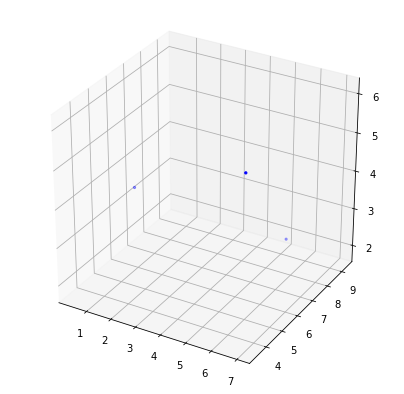

In [104]:
Cube1 = generateCubeRandom(L=10, numeroPuntos=3)
graphCube(Cube1)